# Your name: Neil Wagner
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [1]:
# import packages 
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import datetime
import matplotlib.pyplot as plt

# Data File Reading Section
## Write code to read in data from external sources here

In [3]:
#read datasets
data = pd.read_csv('data.csv')

# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [4]:
data.describe()
data.shape
data.count()
data.isnull()
data.info()
data.head(10)
data.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435732,SAMP,9/12/15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,145.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/9/15
435733,SAMP,12/12/15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,34.0,61.0,161.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/12/15
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/15/15
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/18/15
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/21/15
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/24/15
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/29/15
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [5]:
# Cleaning up the data

#dropping columns that aren't required
data = data.drop(columns=['stn_code','agency','sampling_date','location_monitoring_station'])

# dropping rows where no date is available
data = data[pd.notnull(data['date'])]

In [6]:
# displaying final columns (data.columns)
data.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [7]:
# ... Your code here
types = { "Residential": "R", "Residential and others": "RO", "Residential, Rural and other Areas": "RRO", "Industrial Area": "I", "Industrial Areas": "I", "Industrial": "I", "Sensitive Area": "S", "Sensitive Areas": "S", "Sensitive": "S", np.nan: "RRO" }
data.type = data.type.replace(types)

In [8]:
# Display top 10 records after codification of 'types'
data.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,2/1/90
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,2/1/90
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,2/1/90
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,3/1/90
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,3/1/90
5,Andhra Pradesh,Hyderabad,RRO,6.4,25.7,NaN,NaN,NaN,3/1/90
6,Andhra Pradesh,Hyderabad,RRO,5.4,17.1,NaN,NaN,NaN,4/1/90
7,Andhra Pradesh,Hyderabad,I,4.7,8.7,NaN,NaN,NaN,4/1/90
8,Andhra Pradesh,Hyderabad,RRO,4.2,23.0,NaN,NaN,NaN,4/1/90
9,Andhra Pradesh,Hyderabad,I,4.0,8.9,NaN,NaN,NaN,5/1/90


### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [9]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = pd.DatetimeIndex(data['date']).year
data.head(5)

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [10]:
# define columns of importance, which shall be used reguarly (COLS = ....)
# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy
# Display data.info after the transformation
# Display that there are no more missing values in the dataset

COLS = ['so2','no2','rspm','spm','pm2_5']
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
data[COLS] = imputer.fit_transform(data[COLS])
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 435735 entries, 0 to 435738
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   state     435735 non-null  object        
 1   location  435735 non-null  object        
 2   type      435735 non-null  object        
 3   so2       435735 non-null  float64       
 4   no2       435735 non-null  float64       
 5   rspm      435735 non-null  float64       
 6   spm       435735 non-null  float64       
 7   pm2_5     435735 non-null  float64       
 8   date      435735 non-null  datetime64[ns]
 9   year      435735 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 36.6+ MB


## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

### so2 status

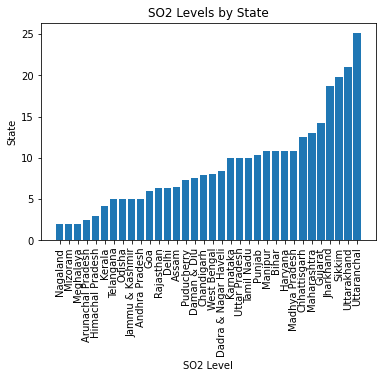

In [11]:
so2 = data.groupby('state').so2.median().sort_values(ascending=True)
plt.bar(so2.index, so2)
plt.xticks(rotation=90)
plt.title('SO2 Levels by State')
plt.ylabel('State')
plt.xlabel('SO2 Level')
plt.show()

### no2 status

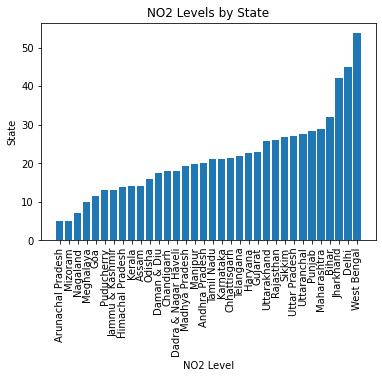

In [12]:
no2 = data.groupby('state').no2.median().sort_values(ascending=True)
plt.bar(no2.index, no2)
plt.xticks(rotation=90)
plt.title('NO2 Levels by State')
plt.ylabel('State')
plt.xlabel('NO2 Level')
plt.show()

### rspm status

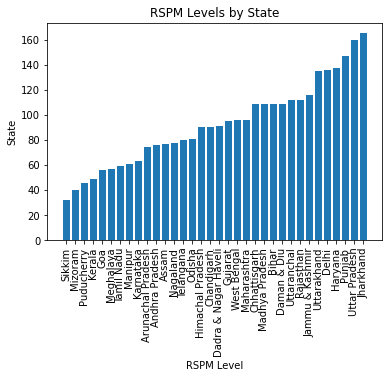

In [13]:
rspm = data.groupby('state').rspm.median().sort_values(ascending=True)
plt.bar(rspm.index, rspm)
plt.xticks(rotation=90)
plt.title('RSPM Levels by State')
plt.ylabel('State')
plt.xlabel('RSPM Level')
plt.show()

### spm status

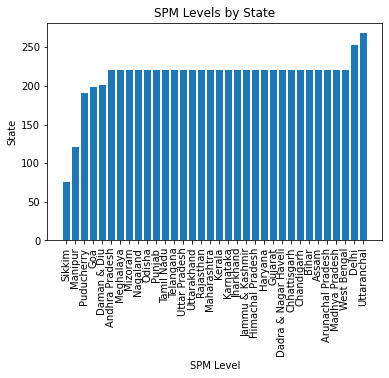

In [14]:
spm = data.groupby('state').spm.median().sort_values(ascending=True)
plt.bar(spm.index, spm)
plt.xticks(rotation=90)
plt.title('SPM Levels by State')
plt.ylabel('State')
plt.xlabel('SPM Level')
plt.show()

### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [15]:
new_df = data[['no2','so2','rspm','spm','state','year']]
new_df = new_df[new_df.state == 'Andhra Pradesh']
new_df.head(5)

,no2,so2,rspm,spm,state,year
0,17.4,4.8,108.833091,220.78348,Andhra Pradesh,1990
1,7.0,3.1,108.833091,220.78348,Andhra Pradesh,1990
2,28.5,6.2,108.833091,220.78348,Andhra Pradesh,1990
3,14.7,6.3,108.833091,220.78348,Andhra Pradesh,1990
4,7.5,4.7,108.833091,220.78348,Andhra Pradesh,1990


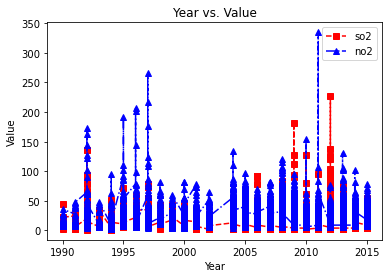

In [16]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 (b) rspm and spm. 
# So, you will display TWO graphs altogether.

plt.plot('year', 'so2', 
         ls='--' ,
         data= new_df, 
         color='red', 
         marker ='s',
         markerfacecolor='red',
         label='so2')
plt.plot('year', 'no2', 
         ls= '-.',
         data= new_df, 
         color='blue', 
         marker='^',
         markerfacecolor='blue',
         label='no2')
plt.legend()
plt.title('Year vs. Value')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

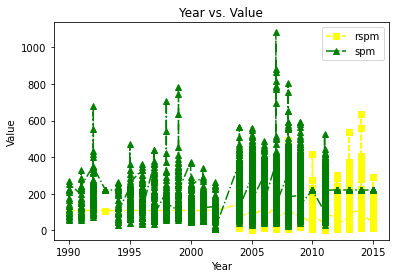

In [17]:
plt.plot('year', 'rspm', 
         ls='--' ,
         data= new_df, 
         color='yellow', 
         marker ='s',
         markerfacecolor='yellow',
         label='rspm')
plt.plot('year', 'spm', 
         ls= '-.',
         data= new_df, 
         color='green', 
         marker='^',
         markerfacecolor='green',
         label='spm')
plt.legend()
plt.title('Year vs. Value')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

Do you find anythumg alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh.

    Based on this Exploratory Data Analysis, one can conclude that the NO2 value is higher than the SO2 value nearly every single year. What's more, the NO2 value is significantly higher during various years, specifically in the mid-late 1990s as well as in certain years throughout the 2000s.
    Furthermore, in regards to the second graph, the SPM value is generally higher each year than the RSPM value. Similarily to the NO2 values, the SPM values are also significantly higher for various years. Something alarming, however, is that this pattern has seemed to change during the most recent years. Since 2011, the RSPM value has become higher than the SPM value each year. This is an interesting change in the pattern of the data that an analyst may want to perform further research on.
